Results from this notebook are featured in the Model Statistics Doc linked:
https://docs.google.com/presentation/d/1hBSB-JPjkXj5B9G6FSXBNjOB7AqnDxKEeuKAjHD1b5A/edit#slide=id.g21eb05b6b47_0_928

This notebook contains batch predict results for models 1 and 2 (using features and reduced coloinear features)

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.io import gbq
from google.cloud import bigquery
from sklearn import metrics
from tabulate import tabulate

[[95834 29709  6282]
 [ 4936 14092  6016]
 [  250  2142  8181]]
[[0.72697895 0.22536696 0.04765409]
 [0.19709312 0.56268967 0.24021722]
 [0.02364513 0.20259151 0.77376336]]


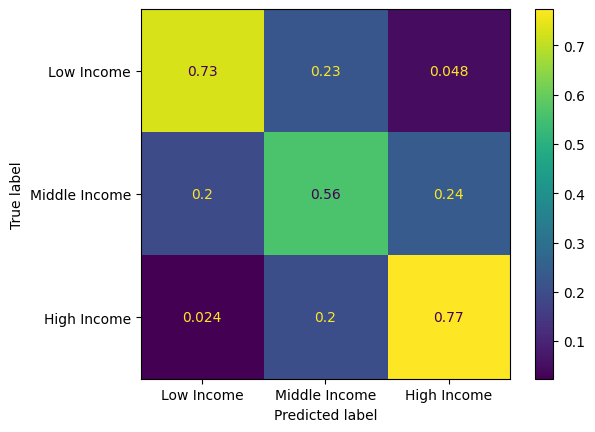

Accuracy: 0.705361
Precision: 0.817973
Recall: 0.705361
F1 score: 0.740717
| Class   |   Precision |   Recall |   F1 Score |
|---------+-------------+----------+------------|
| Low     |    0.948664 | 0.726979 |   0.823157 |
| Middle  |    0.306728 | 0.56269  |   0.39703  |
| High    |    0.399482 | 0.773763 |   0.526923 |


In [9]:
# Batch Predict for Model 1: Multiclass Model
# Linked to Slide 8

Query = '''
SELECT *
FROM `berkeley-data-discovery-2023.outputs.predictions_2023_05_06T01_49_14_917Z_210`
'''
project_id = 'berkeley-data-discovery-2023'
model_1_multiclass = gbq.read_gbq(query=Query, dialect ='standard', project_id=project_id)
model_1_multiclass.sort_values(by=['per_id_proxy'])

actual = model_1_multiclass["income_range"]
predicted = [x.get("classes")[np.where(x.get("scores") == (max(x.get("scores"))))][0] for x in model_1_multiclass["predicted_income_range"]]

confusion_matrix = metrics.confusion_matrix(actual, predicted, labels=["low income", "middle income", "high income"])

print(confusion_matrix)
confusion_matrix_freq = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
print(confusion_matrix_freq)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_freq, display_labels = ["Low Income", "Middle Income", "High Income"])
cm_display.plot()
plt.show()

# accuracy: (tp + tn) / (p + n)
accuracy = metrics.accuracy_score(actual, predicted)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = metrics.precision_score(actual, predicted, average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = metrics.recall_score(actual, predicted, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = metrics.f1_score(actual, predicted, average='weighted')
print('F1 score: %f' % f1)

low_precision = confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[1][0] + confusion_matrix[2][0])
mid_precision = confusion_matrix[1][1] / (confusion_matrix[0][1] + confusion_matrix[1][1] + confusion_matrix[2][1])
high_precision = confusion_matrix[2][2] / (confusion_matrix[0][2] + confusion_matrix[1][2] + confusion_matrix[2][2])

low_recall = confusion_matrix[0][0] / sum(confusion_matrix[0])
mid_recall = confusion_matrix[1][1] / sum(confusion_matrix[1])
high_recall = confusion_matrix[2][2] / sum(confusion_matrix[2])

low_f1_score = (2 * confusion_matrix[0][0]) / ((2*confusion_matrix[0][0]) + confusion_matrix[1][0] + confusion_matrix[2][0] + confusion_matrix[0][1] + confusion_matrix[0][2])
mid_f1_score = (2 * confusion_matrix[1][1]) / ((2*confusion_matrix[1][1]) + confusion_matrix[0][1] + confusion_matrix[2][1] + confusion_matrix[1][0] + confusion_matrix[1][2])
high_f1_score = (2 * confusion_matrix[2][2]) / ((2*confusion_matrix[2][2]) + confusion_matrix[1][2] + confusion_matrix[0][2] + confusion_matrix[2][1] + confusion_matrix[2][0])

print(tabulate([['Low', low_precision, low_recall, low_f1_score], ['Middle', mid_precision, mid_recall, mid_f1_score], ['High', high_precision, high_recall, high_f1_score]], headers=['Class', 'Precision', 'Recall', 'F1 Score'], tablefmt='orgtbl'))

[[54691 23266]
 [ 5567 18472]]
[[0.70155342 0.29844658]
 [0.23158201 0.76841799]]


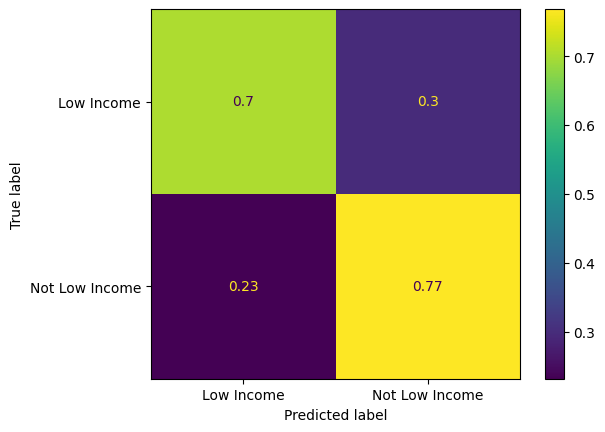

Accuracy: 0.717312
Precision: 0.798010
Recall: 0.717312
F1 score: 0.737245
| Class   |   Precision |   Recall |   F1 Score |
|---------+-------------+----------+------------|
| Low     |    0.751824 | 0.701553 |   0.725819 |
| Not Low |    0.720258 | 0.768418 |   0.743559 |


In [63]:
# Batch Predict for Model 1: Binary Model
# Linked to Slide 10

Query = '''
SELECT *
FROM `berkeley-data-discovery-2023.outputs.predictions_2023_05_09T10_28_27_922Z_903`
'''
project_id = 'berkeley-data-discovery-2023'
model_1_binary = gbq.read_gbq(query=Query, dialect ='standard', project_id=project_id)
model_1_binary.sort_values(by=['per_id_proxy'])

actual = model_1_binary["income_range"]
predicted = [x.get("classes")[np.where(x.get("scores") == (max(x.get("scores"))))][0] for x in model_1_binary["predicted_income_range"]]

confusion_matrix = metrics.confusion_matrix(actual, predicted, labels=["low income", "not low income"])

print(confusion_matrix)
confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
print(confusion_matrix)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Low Income", "Not Low Income"])
cm_display.plot()
plt.show()

# accuracy: (tp + tn) / (p + n)
accuracy = metrics.accuracy_score(actual, predicted)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = metrics.precision_score(actual, predicted, average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = metrics.recall_score(actual, predicted, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = metrics.f1_score(actual, predicted, average='weighted')
print('F1 score: %f' % f1)

low_precision = confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[1][0])
not_low_precision = confusion_matrix[1][1] / (confusion_matrix[0][1] + confusion_matrix[1][1])

low_recall = confusion_matrix[0][0] / sum(confusion_matrix[0])
not_low_recall = confusion_matrix[1][1] / sum(confusion_matrix[1])

low_f1_score = (2 * confusion_matrix[0][0]) / ((2*confusion_matrix[0][0]) + confusion_matrix[1][0] + confusion_matrix[0][1])
not_low_f1_score = (2 * confusion_matrix[1][1]) / ((2*confusion_matrix[1][1]) + confusion_matrix[0][1] + confusion_matrix[1][0])

print(tabulate([['Low', low_precision, low_recall, low_f1_score], ['Not Low', not_low_precision, not_low_recall, not_low_f1_score]], headers=['Class', 'Precision', 'Recall', 'F1 Score'], tablefmt='orgtbl'))

[[94869 29802  6395]
 [ 5020 13851  5992]
 [  273  2121  8119]]
[[0.72382616 0.22738162 0.04879221]
 [0.20190645 0.55709287 0.24100068]
 [0.02596785 0.20175021 0.77228194]]


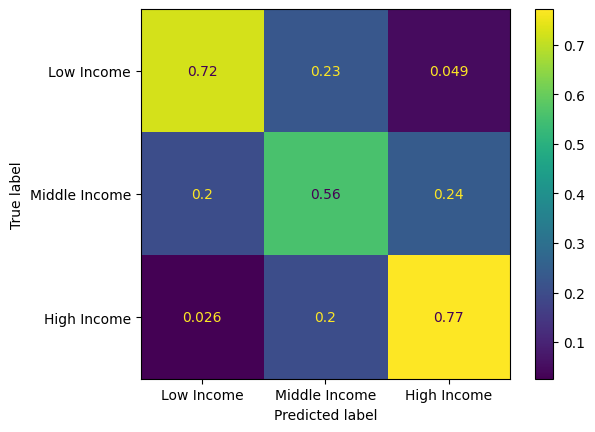

Accuracy: 0.701980
Precision: 0.816055
Recall: 0.701980
F1 score: 0.737809
| Class   |   Precision |   Recall |   F1 Score |
|---------+-------------+----------+------------|
| Low     |    0.760561 | 0.723826 |   0.741739 |
| Middle  |    0.564874 | 0.557093 |   0.560957 |
| High    |    0.727145 | 0.772282 |   0.749034 |


In [62]:
# Batch Predict for Model 2: Multiclass Model
# Linked to Slide 16

Query = '''
SELECT *
FROM `berkeley-data-discovery-2023.outputs.predictions_2023_05_06T01_30_10_520Z_943`
'''
project_id = 'berkeley-data-discovery-2023'
model_2_multiclass = gbq.read_gbq(query=Query, dialect ='standard', project_id=project_id)
model_2_multiclass.sort_values(by=['per_id_proxy'])

actual = model_2_multiclass["income_range"]
predicted = [x.get("classes")[np.where(x.get("scores") == (max(x.get("scores"))))][0] for x in model_2_multiclass["predicted_income_range"]]

confusion_matrix = metrics.confusion_matrix(actual, predicted, labels=["low income", "middle income", "high income"])

print(confusion_matrix)
confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
print(confusion_matrix)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Low Income", "Middle Income", "High Income"])
cm_display.plot()
plt.show()

# accuracy: (tp + tn) / (p + n)
accuracy = metrics.accuracy_score(actual, predicted)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = metrics.precision_score(actual, predicted, average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = metrics.recall_score(actual, predicted, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = metrics.f1_score(actual, predicted, average='weighted')
print('F1 score: %f' % f1)

low_precision = confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[1][0] + confusion_matrix[2][0])
mid_precision = confusion_matrix[1][1] / (confusion_matrix[0][1] + confusion_matrix[1][1] + confusion_matrix[2][1])
high_precision = confusion_matrix[2][2] / (confusion_matrix[0][2] + confusion_matrix[1][2] + confusion_matrix[2][2])

low_recall = confusion_matrix[0][0] / sum(confusion_matrix[0])
mid_recall = confusion_matrix[1][1] / sum(confusion_matrix[1])
high_recall = confusion_matrix[2][2] / sum(confusion_matrix[2])

low_f1_score = (2 * confusion_matrix[0][0]) / ((2*confusion_matrix[0][0]) + confusion_matrix[1][0] + confusion_matrix[2][0] + confusion_matrix[0][1] + confusion_matrix[0][2])
mid_f1_score = (2 * confusion_matrix[1][1]) / ((2*confusion_matrix[1][1]) + confusion_matrix[0][1] + confusion_matrix[2][1] + confusion_matrix[1][0] + confusion_matrix[1][2])
high_f1_score = (2 * confusion_matrix[2][2]) / ((2*confusion_matrix[2][2]) + confusion_matrix[1][2] + confusion_matrix[0][2] + confusion_matrix[2][1] + confusion_matrix[2][0])

print(tabulate([['Low', low_precision, low_recall, low_f1_score], ['Middle', mid_precision, mid_recall, mid_f1_score], ['High', high_precision, high_recall, high_f1_score]], headers=['Class', 'Precision', 'Recall', 'F1 Score'], tablefmt='orgtbl'))

[[48496 29461]
 [ 6150 17889]]
[[0.62208653 0.37791347]
 [0.25583427 0.74416573]]


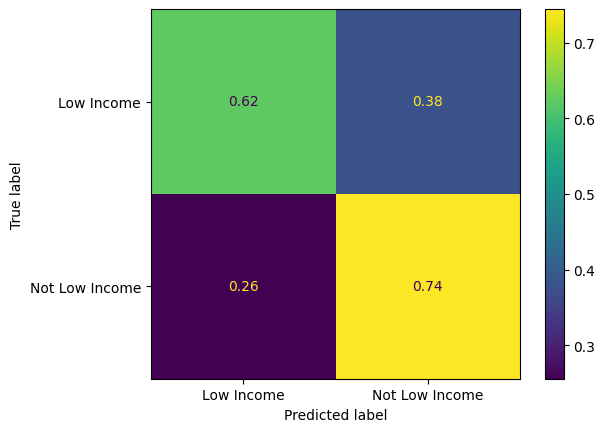

Accuracy: 0.650859
Precision: 0.767339
Recall: 0.650859
F1 score: 0.677174
| Class   |   Precision |   Recall |   F1 Score |
|---------+-------------+----------+------------|
| Low     |    0.708591 | 0.622087 |   0.662527 |
| Not Low |    0.663203 | 0.744166 |   0.701355 |


In [64]:
# Batch Predict for Model 2: Binary Model
# Linked to Slide 18

Query = '''
SELECT *
FROM `berkeley-data-discovery-2023.outputs.predictions_2023_05_06T01_29_10_828Z_061`
'''
project_id = 'berkeley-data-discovery-2023'
model_2_binary = gbq.read_gbq(query=Query, dialect ='standard', project_id=project_id)
model_2_binary.sort_values(by=['per_id_proxy'])

actual = model_2_binary["income_range"]
predicted = [x.get("classes")[np.where(x.get("scores") == (max(x.get("scores"))))][0] for x in model_2_binary["predicted_income_range"]]

confusion_matrix = metrics.confusion_matrix(actual, predicted, labels=["low income", "not low income"])

print(confusion_matrix)
confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
print(confusion_matrix)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Low Income", "Not Low Income"])
cm_display.plot()
plt.show()

# accuracy: (tp + tn) / (p + n)
accuracy = metrics.accuracy_score(actual, predicted)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = metrics.precision_score(actual, predicted, average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = metrics.recall_score(actual, predicted, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = metrics.f1_score(actual, predicted, average='weighted')
print('F1 score: %f' % f1)

low_precision = confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[1][0])
not_low_precision = confusion_matrix[1][1] / (confusion_matrix[0][1] + confusion_matrix[1][1])

low_recall = confusion_matrix[0][0] / sum(confusion_matrix[0])
not_low_recall = confusion_matrix[1][1] / sum(confusion_matrix[1])

low_f1_score = (2 * confusion_matrix[0][0]) / ((2*confusion_matrix[0][0]) + confusion_matrix[1][0] + confusion_matrix[0][1])
not_low_f1_score = (2 * confusion_matrix[1][1]) / ((2*confusion_matrix[1][1]) + confusion_matrix[0][1] + confusion_matrix[1][0])

print(tabulate([['Low', low_precision, low_recall, low_f1_score], ['Not Low', not_low_precision, not_low_recall, not_low_f1_score]], headers=['Class', 'Precision', 'Recall', 'F1 Score'], tablefmt='orgtbl'))

[[69818 22842  6775]
 [ 4324  9564  5574]
 [  232  1979  7019]]
[[0.70214713 0.22971791 0.06813496]
 [0.22217655 0.49141918 0.28640427]
 [0.02513543 0.21440953 0.76045504]]


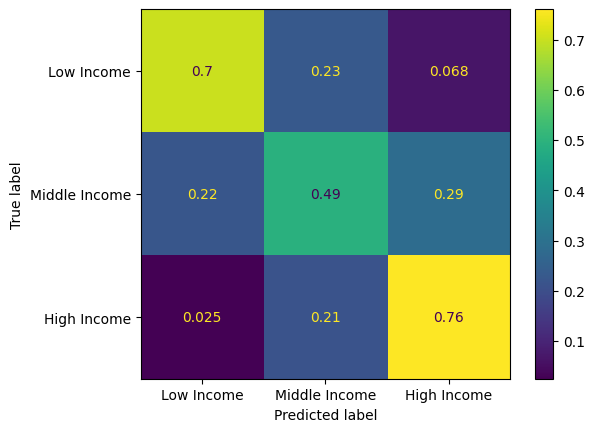

Accuracy: 0.674339
Precision: 0.796881
Recall: 0.674339
F1 score: 0.712801
| Class   |   Precision |   Recall |   F1 Score |
|---------+-------------+----------+------------|
| Low     |    0.938742 | 0.702147 |   0.803388 |
| Middle  |    0.278145 | 0.491419 |   0.355229 |
| High    |    0.362402 | 0.760455 |   0.490873 |


In [11]:
# Batch Predict for Model 3: Multiclass Model
# Linked to Slide 21

Query = '''
SELECT *
FROM `berkeley-data-discovery-2023.outputs.predictions_2023_05_16T12_11_48_017Z_146`
'''
project_id = 'berkeley-data-discovery-2023'
model_1_multiclass = gbq.read_gbq(query=Query, dialect ='standard', project_id=project_id)
# model_1_multiclass.sort_values(by=['per_id_proxy'])

actual = model_1_multiclass["income_range"]
predicted = [x.get("classes")[np.where(x.get("scores") == (max(x.get("scores"))))][0] for x in model_1_multiclass["predicted_income_range"]]

confusion_matrix = metrics.confusion_matrix(actual, predicted, labels=["low income", "middle income", "high income"])

print(confusion_matrix)
confusion_matrix_freq = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
print(confusion_matrix_freq)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_freq, display_labels = ["Low Income", "Middle Income", "High Income"])
cm_display.plot()
plt.show()

# accuracy: (tp + tn) / (p + n)
accuracy = metrics.accuracy_score(actual, predicted)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = metrics.precision_score(actual, predicted, average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = metrics.recall_score(actual, predicted, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = metrics.f1_score(actual, predicted, average='weighted')
print('F1 score: %f' % f1)

low_precision = confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[1][0] + confusion_matrix[2][0])
mid_precision = confusion_matrix[1][1] / (confusion_matrix[0][1] + confusion_matrix[1][1] + confusion_matrix[2][1])
high_precision = confusion_matrix[2][2] / (confusion_matrix[0][2] + confusion_matrix[1][2] + confusion_matrix[2][2])

low_recall = confusion_matrix[0][0] / sum(confusion_matrix[0])
mid_recall = confusion_matrix[1][1] / sum(confusion_matrix[1])
high_recall = confusion_matrix[2][2] / sum(confusion_matrix[2])

low_f1_score = (2 * confusion_matrix[0][0]) / ((2*confusion_matrix[0][0]) + confusion_matrix[1][0] + confusion_matrix[2][0] + confusion_matrix[0][1] + confusion_matrix[0][2])
mid_f1_score = (2 * confusion_matrix[1][1]) / ((2*confusion_matrix[1][1]) + confusion_matrix[0][1] + confusion_matrix[2][1] + confusion_matrix[1][0] + confusion_matrix[1][2])
high_f1_score = (2 * confusion_matrix[2][2]) / ((2*confusion_matrix[2][2]) + confusion_matrix[1][2] + confusion_matrix[0][2] + confusion_matrix[2][1] + confusion_matrix[2][0])

print(tabulate([['Low', low_precision, low_recall, low_f1_score], ['Middle', mid_precision, mid_recall, mid_f1_score], ['High', high_precision, high_recall, high_f1_score]], headers=['Class', 'Precision', 'Recall', 'F1 Score'], tablefmt='orgtbl'))

[[33882 20448]
 [ 7279 13227]]
[[0.62363335 0.37636665]
 [0.35496928 0.64503072]]


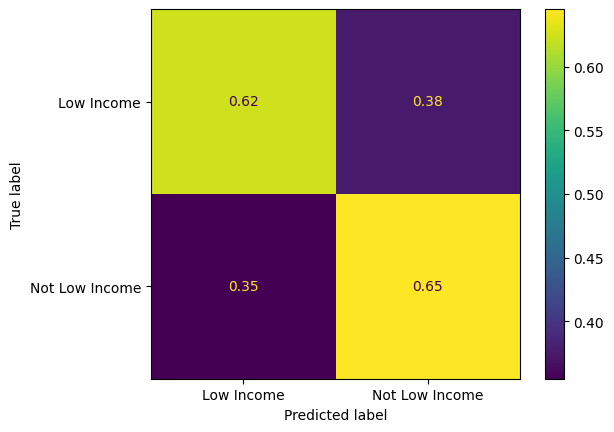

Accuracy: 0.629496
Precision: 0.705230
Recall: 0.629496
F1 score: 0.648975
| Class   |   Precision |   Recall |   F1 Score |
|---------+-------------+----------+------------|
| Low     |    0.637269 | 0.623633 |   0.630378 |
| Not Low |    0.631518 | 0.645031 |   0.638203 |


In [10]:
# Batch Predict for Model 3: Binary Model
# Linked to Slide 22

Query = '''
SELECT *
FROM `berkeley-data-discovery-2023.outputs.predictions_2023_05_16T12_06_02_020Z_172`
'''
project_id = 'berkeley-data-discovery-2023'
model_1_binary = gbq.read_gbq(query=Query, dialect ='standard', project_id=project_id)
# model_1_binary.sort_values(by=['per_id_proxy'])

actual = model_1_binary["income_range"]
predicted = [x.get("classes")[np.where(x.get("scores") == (max(x.get("scores"))))][0] for x in model_1_binary["predicted_income_range"]]

confusion_matrix = metrics.confusion_matrix(actual, predicted, labels=["low income", "not low income"])

print(confusion_matrix)
confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
print(confusion_matrix)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Low Income", "Not Low Income"])
cm_display.plot()
plt.show()

# accuracy: (tp + tn) / (p + n)
accuracy = metrics.accuracy_score(actual, predicted)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = metrics.precision_score(actual, predicted, average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = metrics.recall_score(actual, predicted, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = metrics.f1_score(actual, predicted, average='weighted')
print('F1 score: %f' % f1)

low_precision = confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[1][0])
not_low_precision = confusion_matrix[1][1] / (confusion_matrix[0][1] + confusion_matrix[1][1])

low_recall = confusion_matrix[0][0] / sum(confusion_matrix[0])
not_low_recall = confusion_matrix[1][1] / sum(confusion_matrix[1])

low_f1_score = (2 * confusion_matrix[0][0]) / ((2*confusion_matrix[0][0]) + confusion_matrix[1][0] + confusion_matrix[0][1])
not_low_f1_score = (2 * confusion_matrix[1][1]) / ((2*confusion_matrix[1][1]) + confusion_matrix[0][1] + confusion_matrix[1][0])

print(tabulate([['Low', low_precision, low_recall, low_f1_score], ['Not Low', not_low_precision, not_low_recall, not_low_f1_score]], headers=['Class', 'Precision', 'Recall', 'F1 Score'], tablefmt='orgtbl'))

[[50137 17594 31704]
 [ 6241  3982  9239]
 [ 2401  1712  5117]]
[[0.50421884 0.17693971 0.31884145]
 [0.32067619 0.20460384 0.47471997]
 [0.26013001 0.18548212 0.55438787]]


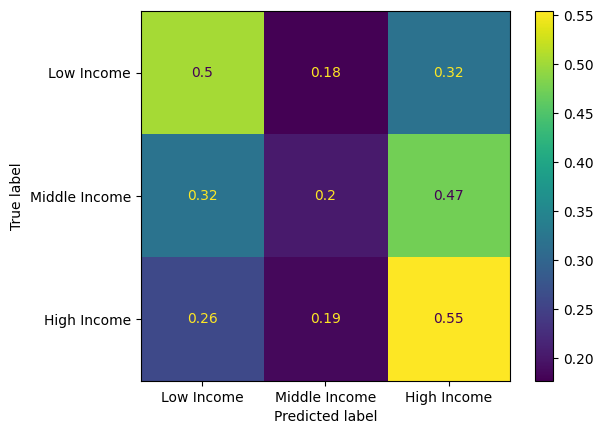

Accuracy: 0.462323
Precision: 0.695940
Recall: 0.462323
F1 score: 0.533492
| Class   |   Precision |   Recall |   F1 Score |
|---------+-------------+----------+------------|
| Low     |    0.464707 | 0.504219 |   0.483657 |
| Middle  |    0.360837 | 0.204604 |   0.261137 |
| High    |    0.411282 | 0.554388 |   0.472232 |


In [7]:
# Batch Predict for Model 4: Multiclass Model
# Linked to Slide 24

Query = '''
SELECT *
FROM `berkeley-data-discovery-2023.outputs.predictions_2023_05_16T14_24_50_919Z_820`
'''
project_id = 'berkeley-data-discovery-2023'
model_2_multiclass = gbq.read_gbq(query=Query, dialect ='standard', project_id=project_id)
# model_2_multiclass.sort_values(by=['per_id_proxy'])

actual = model_2_multiclass["income_range"]
predicted = [x.get("classes")[np.where(x.get("scores") == (max(x.get("scores"))))][0] for x in model_2_multiclass["predicted_income_range"]]

confusion_matrix = metrics.confusion_matrix(actual, predicted, labels=["low income", "middle income", "high income"])

print(confusion_matrix)
confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
print(confusion_matrix)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Low Income", "Middle Income", "High Income"])
cm_display.plot()
plt.show()

# accuracy: (tp + tn) / (p + n)
accuracy = metrics.accuracy_score(actual, predicted)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = metrics.precision_score(actual, predicted, average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = metrics.recall_score(actual, predicted, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = metrics.f1_score(actual, predicted, average='weighted')
print('F1 score: %f' % f1)

low_precision = confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[1][0] + confusion_matrix[2][0])
mid_precision = confusion_matrix[1][1] / (confusion_matrix[0][1] + confusion_matrix[1][1] + confusion_matrix[2][1])
high_precision = confusion_matrix[2][2] / (confusion_matrix[0][2] + confusion_matrix[1][2] + confusion_matrix[2][2])

low_recall = confusion_matrix[0][0] / sum(confusion_matrix[0])
mid_recall = confusion_matrix[1][1] / sum(confusion_matrix[1])
high_recall = confusion_matrix[2][2] / sum(confusion_matrix[2])

low_f1_score = (2 * confusion_matrix[0][0]) / ((2*confusion_matrix[0][0]) + confusion_matrix[1][0] + confusion_matrix[2][0] + confusion_matrix[0][1] + confusion_matrix[0][2])
mid_f1_score = (2 * confusion_matrix[1][1]) / ((2*confusion_matrix[1][1]) + confusion_matrix[0][1] + confusion_matrix[2][1] + confusion_matrix[1][0] + confusion_matrix[1][2])
high_f1_score = (2 * confusion_matrix[2][2]) / ((2*confusion_matrix[2][2]) + confusion_matrix[1][2] + confusion_matrix[0][2] + confusion_matrix[2][1] + confusion_matrix[2][0])

print(tabulate([['Low', low_precision, low_recall, low_f1_score], ['Middle', mid_precision, mid_recall, mid_f1_score], ['High', high_precision, high_recall, high_f1_score]], headers=['Class', 'Precision', 'Recall', 'F1 Score'], tablefmt='orgtbl'))

[[25696 28634]
 [ 8319 12187]]
[[0.47296153 0.52703847]
 [0.40568614 0.59431386]]


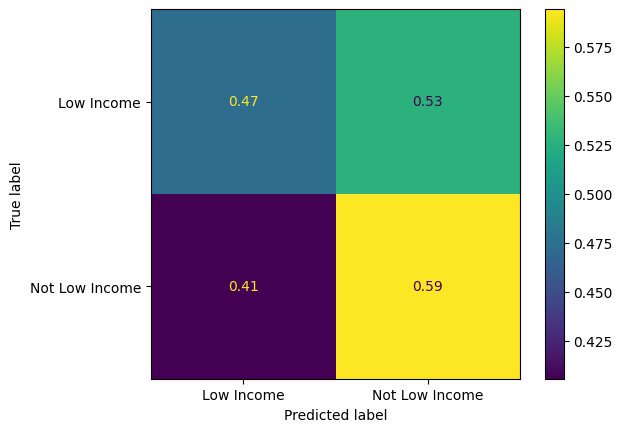

Accuracy: 0.506214
Precision: 0.630239
Recall: 0.506214
F1 score: 0.531225
| Class   |   Precision |   Recall |   F1 Score |
|---------+-------------+----------+------------|
| Low     |    0.538283 | 0.472962 |   0.503513 |
| Not Low |    0.529997 | 0.594314 |   0.560316 |


In [8]:
# Batch Predict for Model 4: Binary Model
# Linked to Slide 25

Query = '''
SELECT *
FROM `berkeley-data-discovery-2023.outputs.predictions_2023_05_16T14_26_18_921Z_667`
'''
project_id = 'berkeley-data-discovery-2023'
model_2_binary = gbq.read_gbq(query=Query, dialect ='standard', project_id=project_id)
# model_2_binary.sort_values(by=['per_id_proxy'])

actual = model_2_binary["income_range"]
predicted = [x.get("classes")[np.where(x.get("scores") == (max(x.get("scores"))))][0] for x in model_2_binary["predicted_income_range"]]

confusion_matrix = metrics.confusion_matrix(actual, predicted, labels=["low income", "not low income"])

print(confusion_matrix)
confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
print(confusion_matrix)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Low Income", "Not Low Income"])
cm_display.plot()
plt.show()

# accuracy: (tp + tn) / (p + n)
accuracy = metrics.accuracy_score(actual, predicted)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = metrics.precision_score(actual, predicted, average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = metrics.recall_score(actual, predicted, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = metrics.f1_score(actual, predicted, average='weighted')
print('F1 score: %f' % f1)

low_precision = confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[1][0])
not_low_precision = confusion_matrix[1][1] / (confusion_matrix[0][1] + confusion_matrix[1][1])

low_recall = confusion_matrix[0][0] / sum(confusion_matrix[0])
not_low_recall = confusion_matrix[1][1] / sum(confusion_matrix[1])

low_f1_score = (2 * confusion_matrix[0][0]) / ((2*confusion_matrix[0][0]) + confusion_matrix[1][0] + confusion_matrix[0][1])
not_low_f1_score = (2 * confusion_matrix[1][1]) / ((2*confusion_matrix[1][1]) + confusion_matrix[0][1] + confusion_matrix[1][0])

print(tabulate([['Low', low_precision, low_recall, low_f1_score], ['Not Low', not_low_precision, not_low_recall, not_low_f1_score]], headers=['Class', 'Precision', 'Recall', 'F1 Score'], tablefmt='orgtbl'))

[[47739 38837 12859]
 [ 1914  9345  8203]
 [   83  1611  7536]]
[[0.48010258 0.39057676 0.12932066]
 [0.09834549 0.48016648 0.42148803]
 [0.00899242 0.17453954 0.81646804]]


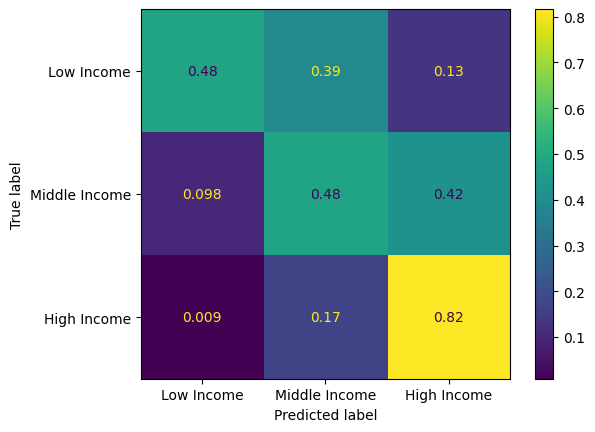

Accuracy: 0.504343
Precision: 0.792396
Recall: 0.504343
F1 score: 0.566422
| Class   |   Precision |   Recall |   F1 Score |
|---------+-------------+----------+------------|
| Low     |    0.817279 | 0.480103 |   0.604876 |
| Middle  |    0.459365 | 0.480166 |   0.469536 |
| High    |    0.597149 | 0.816468 |   0.689795 |


In [ ]:
# Batch Predict for Model 5: Multiclass Model
# Linked to Slide 27

Query = '''
SELECT *
FROM `berkeley-data-discovery-2023.outputs.predictions_2023_05_16T14_22_53_323Z_474`
'''
project_id = 'berkeley-data-discovery-2023'
model_2_multiclass = gbq.read_gbq(query=Query, dialect ='standard', project_id=project_id)
# model_2_multiclass.sort_values(by=['per_id_proxy'])

actual = model_2_multiclass["income_range"]
predicted = [x.get("classes")[np.where(x.get("scores") == (max(x.get("scores"))))][0] for x in model_2_multiclass["predicted_income_range"]]

confusion_matrix = metrics.confusion_matrix(actual, predicted, labels=["low income", "middle income", "high income"])

print(confusion_matrix)
confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
print(confusion_matrix)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Low Income", "Middle Income", "High Income"])
cm_display.plot()
plt.show()

# accuracy: (tp + tn) / (p + n)
accuracy = metrics.accuracy_score(actual, predicted)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = metrics.precision_score(actual, predicted, average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = metrics.recall_score(actual, predicted, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = metrics.f1_score(actual, predicted, average='weighted')
print('F1 score: %f' % f1)

low_precision = confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[1][0] + confusion_matrix[2][0])
mid_precision = confusion_matrix[1][1] / (confusion_matrix[0][1] + confusion_matrix[1][1] + confusion_matrix[2][1])
high_precision = confusion_matrix[2][2] / (confusion_matrix[0][2] + confusion_matrix[1][2] + confusion_matrix[2][2])

low_recall = confusion_matrix[0][0] / sum(confusion_matrix[0])
mid_recall = confusion_matrix[1][1] / sum(confusion_matrix[1])
high_recall = confusion_matrix[2][2] / sum(confusion_matrix[2])

low_f1_score = (2 * confusion_matrix[0][0]) / ((2*confusion_matrix[0][0]) + confusion_matrix[1][0] + confusion_matrix[2][0] + confusion_matrix[0][1] + confusion_matrix[0][2])
mid_f1_score = (2 * confusion_matrix[1][1]) / ((2*confusion_matrix[1][1]) + confusion_matrix[0][1] + confusion_matrix[2][1] + confusion_matrix[1][0] + confusion_matrix[1][2])
high_f1_score = (2 * confusion_matrix[2][2]) / ((2*confusion_matrix[2][2]) + confusion_matrix[1][2] + confusion_matrix[0][2] + confusion_matrix[2][1] + confusion_matrix[2][0])

print(tabulate([['Low', low_precision, low_recall, low_f1_score], ['Middle', mid_precision, mid_recall, mid_f1_score], ['High', high_precision, high_recall, high_f1_score]], headers=['Class', 'Precision', 'Recall', 'F1 Score'], tablefmt='orgtbl'))

[[181809  14123   5649]
 [ 35446  30587  13652]
 [  5923  11125  41741]]
[[0.90191536 0.07006117 0.02802347]
 [0.4448265  0.38384891 0.17132459]
 [0.10075014 0.18923608 0.71001378]]


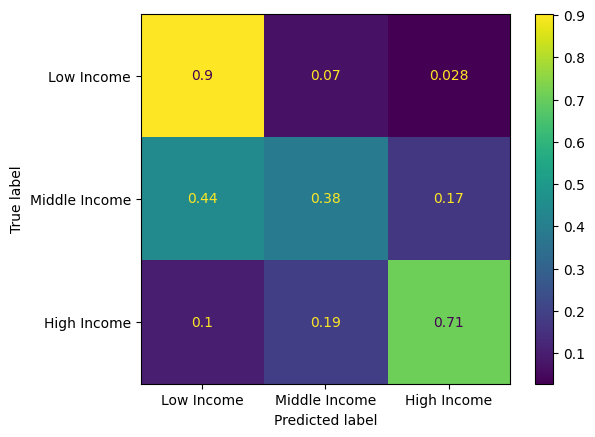

Accuracy: 0.747341
Precision: 0.729494
Recall: 0.747341
F1 score: 0.733679
| Class   |   Precision |   Recall |   F1 Score |
|---------+-------------+----------+------------|
| Low     |    0.814637 | 0.901915 |   0.856057 |
| Middle  |    0.547811 | 0.383849 |   0.451402 |
| High    |    0.683808 | 0.710014 |   0.696664 |


In [6]:
Query = '''
SELECT *
FROM `berkeley-data-discovery-2023.summer_input_data.predictions_2023_09_11T13_58_28_523Z_144`
'''
project_id = 'berkeley-data-discovery-2023'
model_1_multiclass = gbq.read_gbq(query=Query, dialect ='standard', project_id=project_id)
model_1_multiclass.sort_values(by=['per_id'])

actual = model_1_multiclass["income_range"]
predicted = [x.get("classes")[np.where(x.get("scores") == (max(x.get("scores"))))][0] for x in model_1_multiclass["predicted_income_range"]]

confusion_matrix = metrics.confusion_matrix(actual, predicted, labels=["low income", "middle income", "high income"])

print(confusion_matrix)
confusion_matrix_freq = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
print(confusion_matrix_freq)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_freq, display_labels = ["Low Income", "Middle Income", "High Income"])
cm_display.plot()
plt.show()

# accuracy: (tp + tn) / (p + n)
accuracy = metrics.accuracy_score(actual, predicted)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = metrics.precision_score(actual, predicted, average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = metrics.recall_score(actual, predicted, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = metrics.f1_score(actual, predicted, average='weighted')
print('F1 score: %f' % f1)

low_precision = confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[1][0] + confusion_matrix[2][0])
mid_precision = confusion_matrix[1][1] / (confusion_matrix[0][1] + confusion_matrix[1][1] + confusion_matrix[2][1])
high_precision = confusion_matrix[2][2] / (confusion_matrix[0][2] + confusion_matrix[1][2] + confusion_matrix[2][2])

low_recall = confusion_matrix[0][0] / sum(confusion_matrix[0])
mid_recall = confusion_matrix[1][1] / sum(confusion_matrix[1])
high_recall = confusion_matrix[2][2] / sum(confusion_matrix[2])

low_f1_score = (2 * confusion_matrix[0][0]) / ((2*confusion_matrix[0][0]) + confusion_matrix[1][0] + confusion_matrix[2][0] + confusion_matrix[0][1] + confusion_matrix[0][2])
mid_f1_score = (2 * confusion_matrix[1][1]) / ((2*confusion_matrix[1][1]) + confusion_matrix[0][1] + confusion_matrix[2][1] + confusion_matrix[1][0] + confusion_matrix[1][2])
high_f1_score = (2 * confusion_matrix[2][2]) / ((2*confusion_matrix[2][2]) + confusion_matrix[1][2] + confusion_matrix[0][2] + confusion_matrix[2][1] + confusion_matrix[2][0])

print(tabulate([['Low', low_precision, low_recall, low_f1_score], ['Middle', mid_precision, mid_recall, mid_f1_score], ['High', high_precision, high_recall, high_f1_score]], headers=['Class', 'Precision', 'Recall', 'F1 Score'], tablefmt='orgtbl'))

[[60511  3563  1733]
 [12051  6064  3892]
 [ 2406  2598  9199]]
[[0.91952224 0.05414318 0.02633458]
 [0.54759849 0.27554869 0.17685282]
 [0.16940083 0.1829191  0.64768007]]


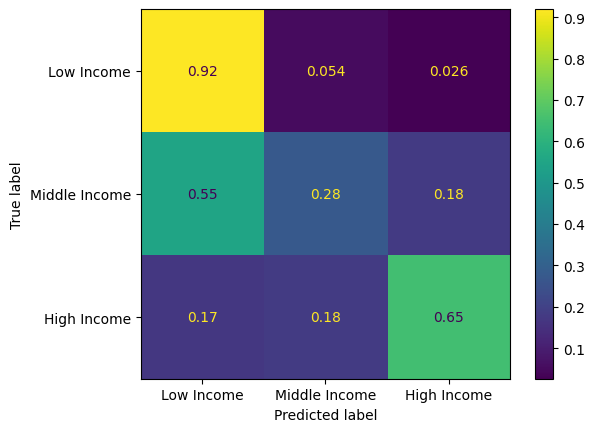

Accuracy: 0.742759
Precision: 0.714062
Recall: 0.742759
F1 score: 0.719216
| Class   |   Precision |   Recall |   F1 Score |
|---------+-------------+----------+------------|
| Low     |    0.807158 | 0.919522 |   0.859684 |
| Middle  |    0.496033 | 0.275549 |   0.354288 |
| High    |    0.620548 | 0.64768  |   0.633824 |


In [7]:
Query = '''
SELECT *
FROM `berkeley-data-discovery-2023.summer_input_data.predictions_2023_09_12T13_32_09_928Z_709`
'''
project_id = 'berkeley-data-discovery-2023'
model_1_multiclass = gbq.read_gbq(query=Query, dialect ='standard', project_id=project_id)
model_1_multiclass.sort_values(by=['per_id'])

actual = model_1_multiclass["income_range"]
predicted = [x.get("classes")[np.where(x.get("scores") == (max(x.get("scores"))))][0] for x in model_1_multiclass["predicted_income_range"]]

confusion_matrix = metrics.confusion_matrix(actual, predicted, labels=["low income", "middle income", "high income"])

print(confusion_matrix)
confusion_matrix_freq = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
print(confusion_matrix_freq)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_freq, display_labels = ["Low Income", "Middle Income", "High Income"])
cm_display.plot()
plt.show()

# accuracy: (tp + tn) / (p + n)
accuracy = metrics.accuracy_score(actual, predicted)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = metrics.precision_score(actual, predicted, average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = metrics.recall_score(actual, predicted, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = metrics.f1_score(actual, predicted, average='weighted')
print('F1 score: %f' % f1)

low_precision = confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[1][0] + confusion_matrix[2][0])
mid_precision = confusion_matrix[1][1] / (confusion_matrix[0][1] + confusion_matrix[1][1] + confusion_matrix[2][1])
high_precision = confusion_matrix[2][2] / (confusion_matrix[0][2] + confusion_matrix[1][2] + confusion_matrix[2][2])

low_recall = confusion_matrix[0][0] / sum(confusion_matrix[0])
mid_recall = confusion_matrix[1][1] / sum(confusion_matrix[1])
high_recall = confusion_matrix[2][2] / sum(confusion_matrix[2])

low_f1_score = (2 * confusion_matrix[0][0]) / ((2*confusion_matrix[0][0]) + confusion_matrix[1][0] + confusion_matrix[2][0] + confusion_matrix[0][1] + confusion_matrix[0][2])
mid_f1_score = (2 * confusion_matrix[1][1]) / ((2*confusion_matrix[1][1]) + confusion_matrix[0][1] + confusion_matrix[2][1] + confusion_matrix[1][0] + confusion_matrix[1][2])
high_f1_score = (2 * confusion_matrix[2][2]) / ((2*confusion_matrix[2][2]) + confusion_matrix[1][2] + confusion_matrix[0][2] + confusion_matrix[2][1] + confusion_matrix[2][0])

print(tabulate([['Low', low_precision, low_recall, low_f1_score], ['Middle', mid_precision, mid_recall, mid_f1_score], ['High', high_precision, high_recall, high_f1_score]], headers=['Class', 'Precision', 'Recall', 'F1 Score'], tablefmt='orgtbl'))

[[53975  4649  1886]
 [10922  8634  4340]
 [ 1876  3587 12148]]
[[0.89200132 0.07683028 0.0311684 ]
 [0.45706394 0.3613157  0.18162035]
 [0.10652433 0.20367952 0.68979615]]


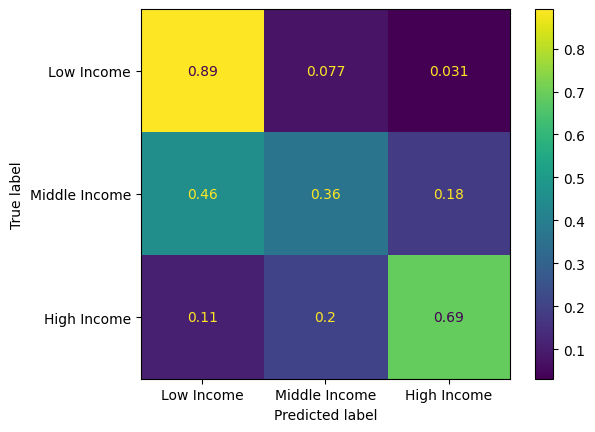

Accuracy: 0.732790
Precision: 0.713468
Recall: 0.732790
F1 score: 0.718818
| Class   |   Precision |   Recall |   F1 Score |
|---------+-------------+----------+------------|
| Low     |    0.808336 | 0.892001 |   0.84811  |
| Middle  |    0.511796 | 0.361316 |   0.423588 |
| High    |    0.661152 | 0.689796 |   0.67517  |


In [10]:
Query = '''
SELECT *
FROM `berkeley-data-discovery-2023.summer_input_data.predictions_2023_09_12T14_57_35_823Z_347`
'''
project_id = 'berkeley-data-discovery-2023'
model_1_multiclass = gbq.read_gbq(query=Query, dialect ='standard', project_id=project_id)
model_1_multiclass.sort_values(by=['per_id'])

actual = model_1_multiclass["income_range"]
predicted = [x.get("classes")[np.where(x.get("scores") == (max(x.get("scores"))))][0] for x in model_1_multiclass["predicted_income_range"]]

confusion_matrix = metrics.confusion_matrix(actual, predicted, labels=["low income", "middle income", "high income"])

print(confusion_matrix)
confusion_matrix_freq = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
print(confusion_matrix_freq)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_freq, display_labels = ["Low Income", "Middle Income", "High Income"])
cm_display.plot()
plt.show()

# accuracy: (tp + tn) / (p + n)
accuracy = metrics.accuracy_score(actual, predicted)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = metrics.precision_score(actual, predicted, average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = metrics.recall_score(actual, predicted, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = metrics.f1_score(actual, predicted, average='weighted')
print('F1 score: %f' % f1)

low_precision = confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[1][0] + confusion_matrix[2][0])
mid_precision = confusion_matrix[1][1] / (confusion_matrix[0][1] + confusion_matrix[1][1] + confusion_matrix[2][1])
high_precision = confusion_matrix[2][2] / (confusion_matrix[0][2] + confusion_matrix[1][2] + confusion_matrix[2][2])

low_recall = confusion_matrix[0][0] / sum(confusion_matrix[0])
mid_recall = confusion_matrix[1][1] / sum(confusion_matrix[1])
high_recall = confusion_matrix[2][2] / sum(confusion_matrix[2])

low_f1_score = (2 * confusion_matrix[0][0]) / ((2*confusion_matrix[0][0]) + confusion_matrix[1][0] + confusion_matrix[2][0] + confusion_matrix[0][1] + confusion_matrix[0][2])
mid_f1_score = (2 * confusion_matrix[1][1]) / ((2*confusion_matrix[1][1]) + confusion_matrix[0][1] + confusion_matrix[2][1] + confusion_matrix[1][0] + confusion_matrix[1][2])
high_f1_score = (2 * confusion_matrix[2][2]) / ((2*confusion_matrix[2][2]) + confusion_matrix[1][2] + confusion_matrix[0][2] + confusion_matrix[2][1] + confusion_matrix[2][0])

print(tabulate([['Low', low_precision, low_recall, low_f1_score], ['Middle', mid_precision, mid_recall, mid_f1_score], ['High', high_precision, high_recall, high_f1_score]], headers=['Class', 'Precision', 'Recall', 'F1 Score'], tablefmt='orgtbl'))